Group Project Proposal

In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

**Title:**

Predicting the real price of a private room for a Parisian Airbnb rental on a weekday

**Introduction:**

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to undertand the rest of your proposal. Clearly state the question you will try to answer with your project. Identify and describe the dataset that will be used to answer the question. 

Airbnb is an online service that connects hosts with properties to rent with travelers that are interested in renting on a short-term basis. The host sets the price of their Airbnb rental based on factors such as the capacity of the rental, distance to the city center, and to the nearest metro station. We will use these predictors to help us predict the price of a private room Airbnb rental in Paris on any given weekday. 

The dataset we will be using is **paris_weekdays.csv** from *Airbnb Prices in European Cities* posted on https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?resource=download&select=paris_weekdays.csv. The dataset is a .csv file with 3129 observations and 20 vector variables. We will be using 6 of the variables to make our predictions: dist, metro_dist, person_capacity, and room_type will be used to predict realSum. All the variables are double (dbl) except room_type, which is a character (chr).  

**Preliminary exploratory data analysis:**

Demonstrate that the dataset can be read from the web into R. 
Clean and wrangle your data into a tidy format.
**Using only training data**, summarize the data in at least one table (this is exploratory data analysis). 
An example of a useful table could be one that reports the number of observations in each class, 
the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
**Using only training data**, visualize the data with at least one plot relevant to the analysis you plan to do 
(this is exploratory data analysis). An example of a useful visualization could be one that compares the 
distributions of each of the predictor variables you plan to use in your analysis.

In [7]:
paris_dataset <- read_csv("https://raw.githubusercontent.com/chadsc79/dsci-100-2022w2-group-7-section-005/main/paris_weekdays.csv")
paris_dataset

New names:
• `` -> `...1`
Rows: 3130 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3127,567.8535,Entire home/apt,FALSE,FALSE,6,TRUE,0,0,10,96,3,4.312136,0.3046418,178.2228,8.675825,420.7262,24.72168,2.39334,48.88463
3128,200.3915,Entire home/apt,FALSE,FALSE,2,TRUE,0,0,9,93,1,2.891206,0.2406864,235.1685,11.447924,602.4515,35.39977,2.38200,48.87400
3129,301.2862,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,10,92,1,3.469721,0.5084927,200.6395,9.767062,478.9928,28.14540,2.39992,48.85886


In [8]:
# <<<<<<< REMOTE CELL DELETED >>>>>>>
# #read in the data
# url <- 

# paris_dataset <- read_csv("paris_weekdays.csv" )
# paris_dataset

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: <<
    ^


In [9]:
#split the data into a testing set and a training set
paris_split <- initial_split(paris_dataset, prop = .75, strata = realSum)  
paris_train <- training(paris_split) 

paris_test <- testing(paris_split)
paris_train

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.302325,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475
6,193.6341,Private room,FALSE,TRUE,2,FALSE,0,0,10,90,1,3.998176,0.4158379,422.8956,20.58642,803.4340,47.20941,2.30670,48.87582
11,239.3047,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,89,0,1.326515,0.1642500,479.0068,23.31789,1219.4941,71.65691,2.34840,48.86815
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3086,4184.6864,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,9,90,3,3.869385,0.3478899,194.7005,9.477954,465.8766,27.37470,2.38782,48.88257
3100,556.2028,Entire home/apt,FALSE,FALSE,6,FALSE,0,0,10,91,3,2.746718,0.3665201,234.9140,11.435533,592.6457,34.82358,2.38472,48.86943
3127,567.8535,Entire home/apt,FALSE,FALSE,6,TRUE,0,0,10,96,3,4.312136,0.3046418,178.2228,8.675825,420.7262,24.72168,2.39334,48.88463


In [10]:
#select variables to predict the data and filter for private room
paris_training_dataset <- select(paris_train, dist, metro_dist, person_capacity, room_type, realSum)|>
filter(room_type == "Private room")
paris_training_dataset

dist,metro_dist,person_capacity,room_type,realSum
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3.302325,0.2347238,2,Private room,211.3431
3.998176,0.4158379,2,Private room,193.6341
1.907832,0.1651561,2,Private room,158.4491
⋮,⋮,⋮,⋮,⋮
3.265155,0.2126742,2,Private room,577.6400
3.127246,0.1496720,5,Private room,586.2615
3.414061,0.2991239,2,Private room,523.5809


In [11]:
#find the min/max of the training dataset
options(digits= 4)
min_max_prices <- summarize(paris_training_dataset,
          minimum_price = min(realSum),
          maximum_price = max(realSum))
min_max_prices

minimum_price,maximum_price
<dbl>,<dbl>
120.9,1274


In [12]:
#create price ranges to be predicted with the training set
paris_training_dataset$price_range <- cut(paris_training_dataset$realSum, breaks = c(0, 150, 250, 500, 1000, 2000, 5000, 10000, 15000))
paris_training_dataset

dist,metro_dist,person_capacity,room_type,realSum,price_range
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
3.302,0.2347,2,Private room,211.3,"(150,250]"
3.998,0.4158,2,Private room,193.6,"(150,250]"
1.908,0.1652,2,Private room,158.4,"(150,250]"
⋮,⋮,⋮,⋮,⋮,⋮
3.265,0.2127,2,Private room,577.6,"(500,1e+03]"
3.127,0.1497,5,Private room,586.3,"(500,1e+03]"
3.414,0.2991,2,Private room,523.6,"(500,1e+03]"


In [13]:
#find the training set average of each variable
options(digits=4)
summarized_paris_training_dataset <- summarize(paris_training_dataset,
                                      avg_dist = mean(dist),
                                      avg_metro_dist = mean(metro_dist),
                                      avg_person_capacity = mean(person_capacity),
                                      avg_price = mean(realSum))
summarized_paris_training_dataset

avg_dist,avg_metro_dist,avg_person_capacity,avg_price
<dbl>,<dbl>,<dbl>,<dbl>
3.154,0.2314,2.277,304.7


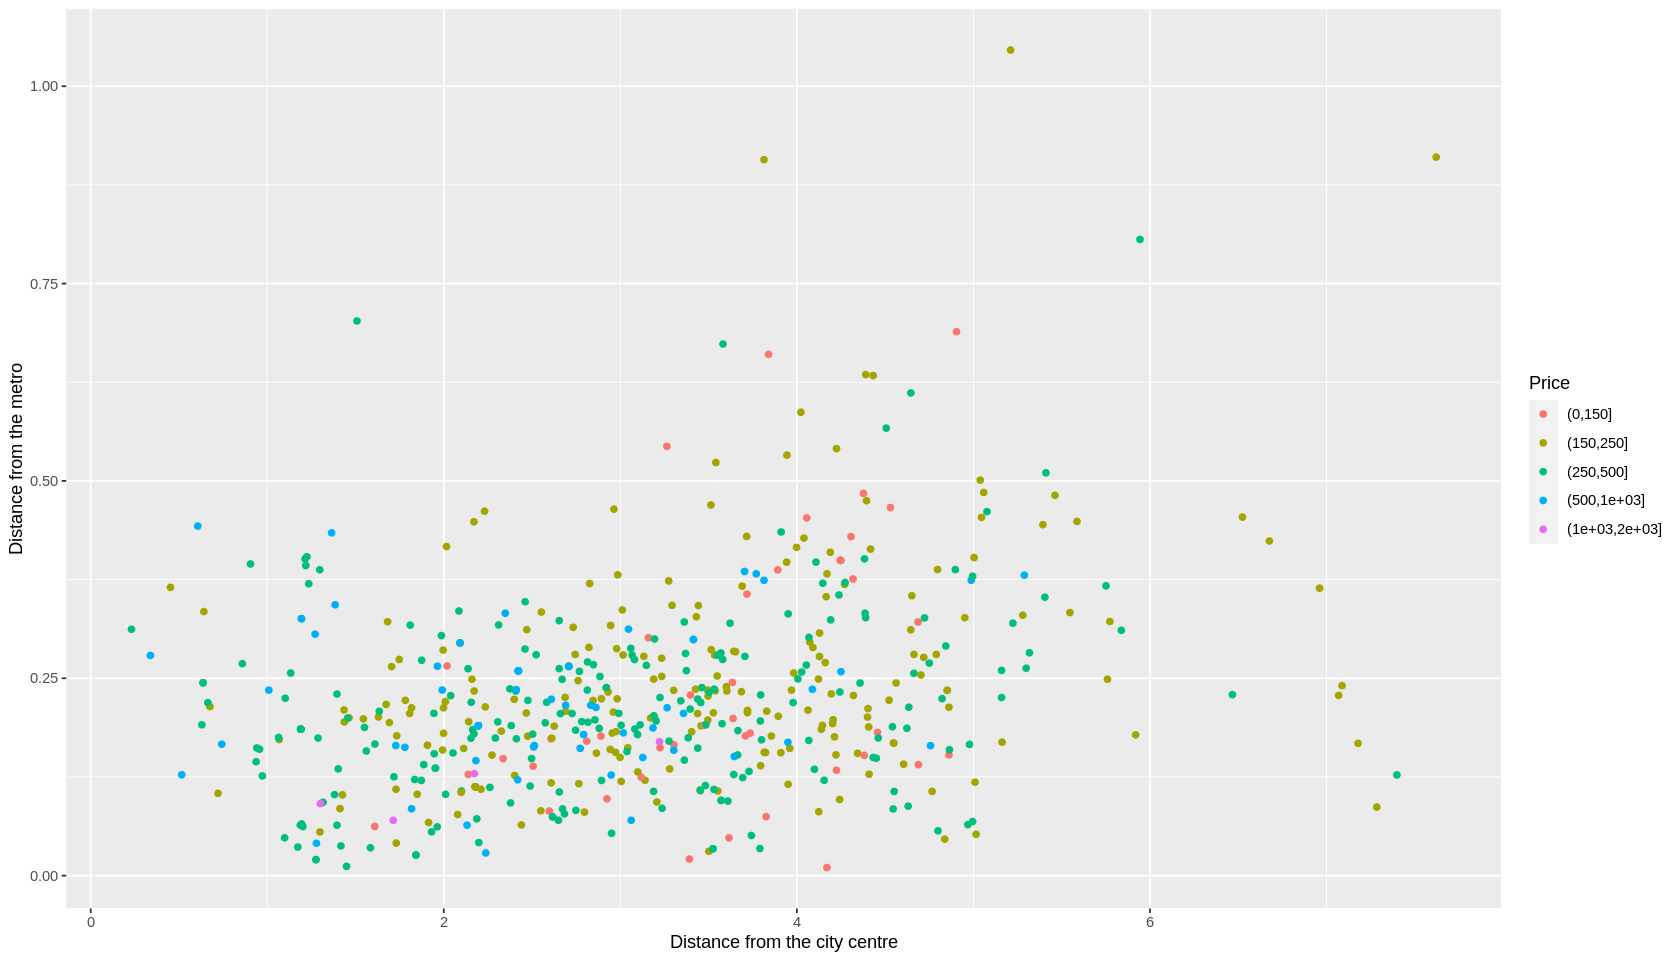

In [14]:
#scatterplot of distance from the city centre and distance from the metro for private room types for private rooms, categorized by price
options(repr.plot.width = 14, repr.plot.height = 8)
dataset_visual <- paris_training_dataset|>
ggplot( aes(x = dist, y = metro_dist, color = price_range))+
geom_point()+
labs(x = "Distance from the city centre", y = "Distance from the metro", color = "Price")
dataset_visual

**Methods:**

Explain how you will conduct either your data analysis and which variables/columns you will use. 
Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that is often not a good idea. 
For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

We will be using distance from the city center, distance from the nearest metro, and room capacity to predict the price of a private room. These variables were chosen from the others because they are the most generalizable to a renter. While variables such as 'cleanliness' or high 'guest satisfaction' are important, we chose more practical variables, to account for the 'needs' of a renter, as opposed to extra bonuses that come with a room. 

Distance from the city center and metro stations are essential variables, as the purpose of Airbnb encompasses the act of traveling. Hence, assuming we have regular travelers, it would make sense that they ought to look for locations that are closest to the city center and public transportation. Room type and room capacity both contribute to the price enormously, as multiple rooms with more people will be priced differently than a singular bedroom for one person.

With these variables, we will visualize the results with bar graphs and scatter plots. Bar graphs offer a clear comparison of price changes according to the chosen variable. From here we can find the average price and observe the relationship. Scatterplots allow us to see if there exists a correlational relationship between the chosen variable and price. We believe that these two visualizations will help us predict how Airbnb hosts choose their room prices. 

**Expected outcomes and significance:**

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

We expect to find that private room rentals that allow more people, are closer to the city center and are closer to the metro will be more expensive than ones that are farther away, and have a lower occupancy. 

Any impacts from this study will help Airbnb hosts determine the private room price that they charge for their rental based on the criteria we used in the study. And it will help renters gauge how much to expect to pay when they are staying in areas that are similar to those in the study.

Our findings could lead to questions such as:
Do these findings also occur in other Airbnb cities?
Is there a difference in price for Airbnb rentals in urban areas compared to rural areas using the same criteria?